In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import KernelPCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [2]:
df = pd.read_csv('data_processed.csv', index_col=0)
data = np.load('training_data.npy')

## Polynomial Function

In [3]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=2)
res_kpca_poly = kpca.fit_transform(data)

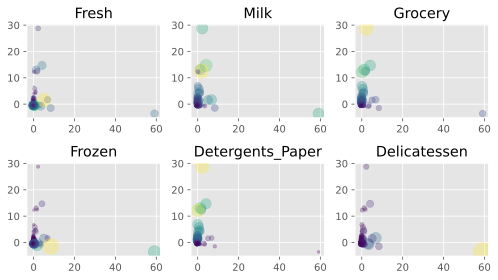

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1],
               s=sizes, alpha=0.3,c=df[feature],cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

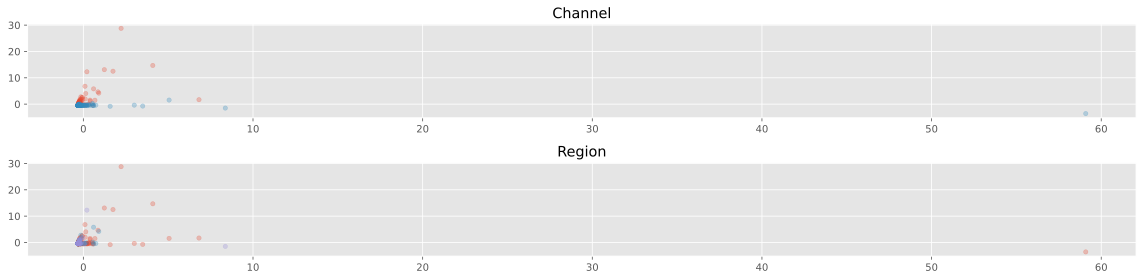

In [5]:
fig, axes = plt.subplots(2,1, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_poly[df[feature]==unique_val, 0], res_kpca_poly[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Radial Basis Function

In [6]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
res_kpca_rbf = kpca.fit_transform(data)

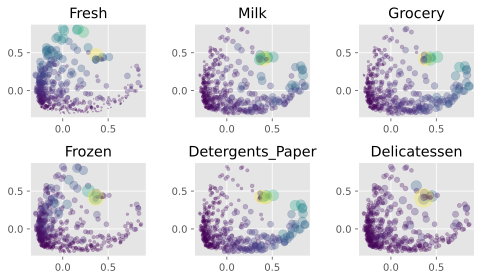

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(7,4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

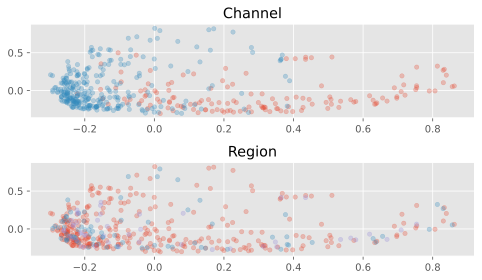

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_rbf[df[feature]==unique_val, 0], res_kpca_rbf[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Cosine Function

In [9]:
kpca = KernelPCA(n_components=2, kernel='cosine')
res_kpca_cos = kpca.fit_transform(data)

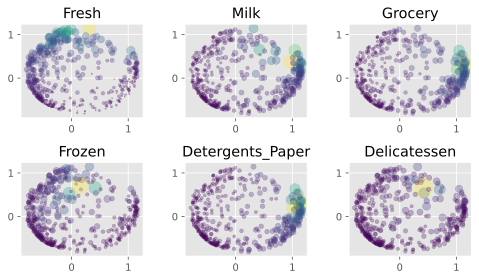

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(7,4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_cos[:, 0], res_kpca_cos[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

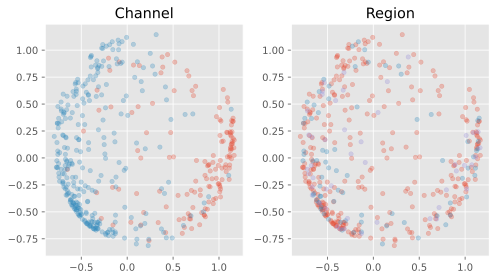

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_cos[df[feature]==unique_val, 0], res_kpca_cos[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Append to DataFrame

In [12]:
df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Retail  Other  12669  9656     7561     214              2674          1338
1  Retail  Other   7057  9810     9568    1762              3293          1776
2  Retail  Other   6353  8808     7684    2405              3516          7844
3  HoReCa  Other  13265  1196     4221    6404               507          1788
4  Retail  Other  22615  5410     7198    3915              1777          5185

In [13]:
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

df['x_kpca_poly'] = res_kpca_poly[:, 0]
df['y_kpca_poly'] = res_kpca_poly[:, 1]

df['x_kpca_cos'] = res_kpca_cos[:, 0]
df['y_kpca_cos'] = res_kpca_cos[:, 1]

In [14]:
df

Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Retail  Other  12669   9656     7561     214              2674   
1    Retail  Other   7057   9810     9568    1762              3293   
2    Retail  Other   6353   8808     7684    2405              3516   
3    HoReCa  Other  13265   1196     4221    6404               507   
4    Retail  Other  22615   5410     7198    3915              1777   
..      ...    ...    ...    ...      ...     ...               ...   
435  HoReCa  Other  29703  12051    16027   13135               182   
436  HoReCa  Other  39228   1431      764    4510                93   
437  Retail  Other  14531  15488    30243     437             14841   
438  HoReCa  Other  10290   1981     2232    1038               168   
439  HoReCa  Other   2787   1698     2510      65               477   

     Delicatessen  x_kpca_rbf  y_kpca_rbf  x_kpca_poly  y_kpca_poly  \
0            1338    0.052874   -0.095702    -0.298146    -0.307672   
1            1776    0.129646   -0.160458    -0.272613    -0.248762   
2            7844    0.210205    0.048446     0.557870    -0.356102   
3            1788   -0.216243    0.105165    -0.263419    -0.454023   
4            5185   -0.011687    0.265432     0.126922    -0.432733   
..            ...         ...         ...          ...          ...   
435          2204    0.160965    0.533841     0.319105    -0.223157   
436          2346   -0.180932    0.570433    -0.199863    -0.452928   
437          1867    0.830631    0.104410    -0.077851     2.473393   
438          2125   -0.221278   -0.066883    -0.312088    -0.434577   
439            52   -0.194753   -0.224900    -0.259689    -0.434773   

     x_kpca_cos  y_kpca_cos  
0      0.504789    0.009622  
1      0.889941   -0.262833  
2      0.473994    0.235687  
3     -0.618611    0.370131  
4      0.068900    0.861829  
..          ...         ...  
435    0.251200    0.970344  
436   -0.400170    0.931981  
437    1.135432    0.306253  
438   -0.594661   -0.179908  
439   -0.370289   -0.631223  

[440 rows x 14 columns]

In [15]:
df.to_csv('data_with_latent.csv')